# Unsupervised Learning
## Project: Creating Customer Segments

## Intro
In this project, I will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, I will begin exploring the data through visualizations and code to understand how each feature is related to the others, observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, the `indices` list which will represent the customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [66,75,165]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9,1534,7417,175,3468,27
1,20398,1137,3,4407,3,975
2,15615,12653,19858,4425,7108,2379


In [4]:
print(np.round(data.mean()))
print(np.round(data.median()))
display(samples - np.round(data.mean()))
display(samples - np.round(data.median()))

Fresh               12000.0
Milk                 5796.0
Grocery              7951.0
Frozen               3072.0
Detergents_Paper     2881.0
Delicatessen         1525.0
dtype: float64
Fresh               8504.0
Milk                3627.0
Grocery             4756.0
Frozen              1526.0
Detergents_Paper     816.0
Delicatessen         966.0
dtype: float64


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-11991.0,-4262.0,-534.0,-2897.0,587.0,-1498.0
1,8398.0,-4659.0,-7948.0,1335.0,-2878.0,-550.0
2,3615.0,6857.0,11907.0,1353.0,4227.0,854.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-8495.0,-2093.0,2661.0,-1351.0,2652.0,-939.0
1,11894.0,-2490.0,-4753.0,2881.0,-813.0,9.0
2,7111.0,9026.0,15102.0,2899.0,6292.0,1413.0


**Comment:**
1. Sample 1: Fresh category count is considerably lower than the mean of data, and also the other products except detergents paper. However, in details, we can see that store focuses on grocery and detergrents paper and milk, which account for more than 98% of their expenditure. Hence, this customer may be a convenience store.
2. Sample 2: Fresh product of this customer is quite large, and count 1.6 times the mean. It even located in the third quantile. However, the other categories are way lower than the average, especially grocery and detergents paper. Thus, this customer can be classified as a store which specializes on fresh product like a meat or vegetable supermarket.
3. Sample 3: All categories of this sample are all above the mean of dataset, and almost (except fresh product category) values in the third quantiles of data. This can be good example of a supermarket.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, I will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
y = data.Fresh.values
new_data = data.drop(['Fresh'],axis=1).values

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size=0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=0).fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print(score)

-0.33307053360466754


**Comment:**
1. Which feature did I attempt to predict?
I tried to predicted the amount of money, customer is willing to spend on fresh products. It seems to be the item, all customer spend much money on.
2. What was the reported prediction score?
As the score from the model, the model has really low score, even negative score -.33. That can be said that the regression model can not predict any thing about the amout of money spending on Fresh product based on the total value of other attributes.
3. Is this feature necessary for identifying customers' spending habits?
Yes, it is necessary for identifying customers' spending habits. As the regression model can not predict anything about the Fresh product, that means this feature will give the model more information.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. 

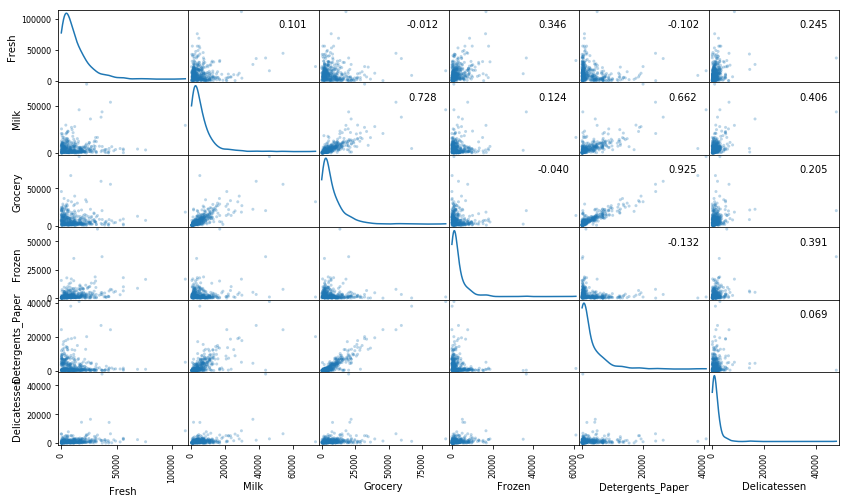

In [6]:
# Produce a scatter matrix for each pair of features in the data
axes = pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
corr = data.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

                   Channel    Region     Fresh      Milk   Grocery    Frozen  \
Channel           1.000000  0.062226 -0.170044  0.457571  0.607464 -0.202870   
Region            0.062226  1.000000  0.059294  0.030209  0.004087 -0.018592   
Fresh            -0.170044  0.059294  1.000000  0.105142 -0.006007  0.343421   
Milk              0.457571  0.030209  0.105142  1.000000  0.726697  0.127304   
Grocery           0.607464  0.004087 -0.006007  0.726697  1.000000 -0.037003   
Frozen           -0.202870 -0.018592  0.343421  0.127304 -0.037003  1.000000   
Detergents_Paper  0.636996 -0.006368 -0.096923  0.659448  0.921652 -0.129729   
Delicatessen      0.054665  0.046806  0.243222  0.408709  0.208455  0.390155   

                  Detergents_Paper  Delicatessen  
Channel                   0.636996      0.054665  
Region                   -0.006368      0.046806  
Fresh                    -0.096923      0.243222  
Milk                      0.659448      0.408709  
Grocery                 

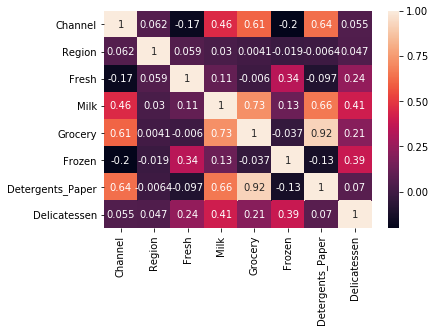

In [33]:
import seaborn as sns
ax = sns.heatmap(data.corr(), annot=True)
print(data.corr())

**Comment:**
1. As the graphs show, we can see that all attributes have skew distribution, which tends to have most of it value close to the zero point, however the mode values may differ.
2. Again, in the graph shows that, there is a strong correlation between grocery products-detergents paper and milk-detergents paper, as in the correlation calculation above the graph we can see that the correlation value up to 0.924641, 0.66 respectively. This means one value can explain up to more than 90%, 66% value of the other value.
3. Except the correlation above, there is no clear correlation between any other pair of attribute, especially for the value of fresh product. I can be seen in the graph, there is no linear relationship between fresh product and other value. Therefore, it confirms the result of previous question when it say that it is really hard to predict value of fresh products.
4. The data of those feature does not have normal distribution, all of them are right skewed.

## Data Preprocessing
In this section, I will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. It is a critical step in assuring that results are significant and meaningful.

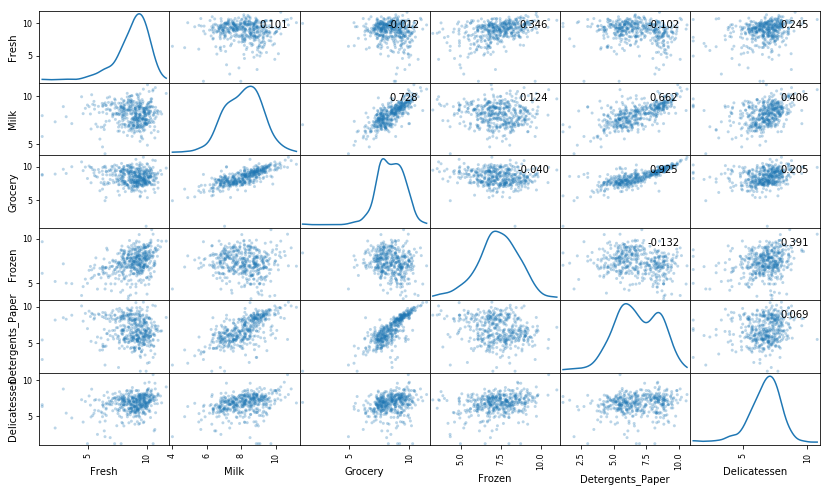

In [7]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
axes = pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
corr = data.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal.

                     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Fresh             1.000000 -0.019834 -0.132713  0.383996         -0.155871   
Milk             -0.019834  1.000000  0.758851 -0.055316          0.677942   
Grocery          -0.132713  0.758851  1.000000 -0.164524          0.796398   
Frozen            0.383996 -0.055316 -0.164524  1.000000         -0.211576   
Detergents_Paper -0.155871  0.677942  0.796398 -0.211576          1.000000   
Delicatessen      0.255186  0.337833  0.235728  0.254718          0.166735   

                  Delicatessen  
Fresh                 0.255186  
Milk                  0.337833  
Grocery               0.235728  
Frozen                0.254718  
Detergents_Paper      0.166735  
Delicatessen          1.000000  


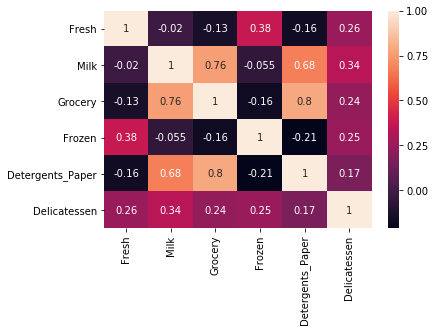

In [11]:
_ = sns.heatmap(log_data.corr(), annot=True)
print(log_data.corr())

In [12]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
1,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
2,9.655987,9.445650,9.896362,8.395026,8.868976,7.774436


### Implementation: Outlier Detection
In the code block below, I will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

In [14]:
all_outliers = []
import collections
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    data = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
#     display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    all_outliers = np.append(all_outliers, data.index.values)
    
# OPTIONAL: Select the indices for data points to remove
frequencyOfOutlierEntry = collections.Counter(all_outliers.flatten())

outliers  = []

outliersInManyFeatures  = []

for entry, frequency in frequencyOfOutlierEntry.items():
    if frequency >= 2:
        outliersInManyFeatures.append(int(entry))
        if entry not in indices:
            outliers.append(int(entry))

print(outliersInManyFeatures)

print(outliers)

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':
Data points considered outliers for the feature 'Milk':
Data points considered outliers for the feature 'Grocery':
Data points considered outliers for the feature 'Frozen':
Data points considered outliers for the feature 'Detergents_Paper':
Data points considered outliers for the feature 'Delicatessen':
[65, 66, 128, 154, 75]
[65, 128, 154]


**Comment:**
1. Are there any data points considered outliers for more than one feature based on the definition above?
Yes, as the array of outliers above: entry at 65, 66, 128, 154, 75 are considered outliers for more than one feature.
2. Should these data points be removed from the dataset?
No, these data should not be removed from the dataset. First of all, this datapoint may be an outlier in these feature, but in another features, may be it is not. That means by removing them we can delete useful data. However, in this case, I think we should remove it, because the existence of outliers makes it really hard to choose the best cluster number since the differences in score between models are not stable and clear.
3. If any data points were added to the outliers list to be removed, explain why.
The datapoint 65, 128, 154 should be removed. First they make the choosing model step harder, and they are not in the samples list.

## Feature Transformation
In this section, I will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

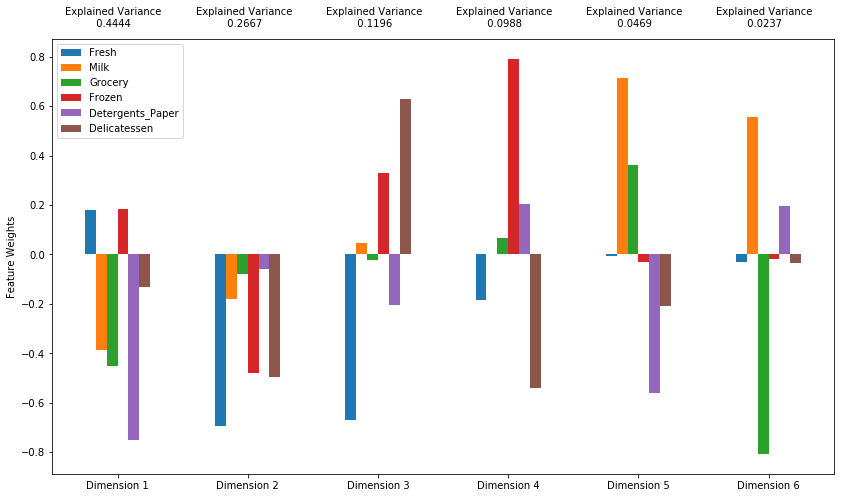

In [35]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA().fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

**Comment:**
1. How much variance in the data is explained in total by the first and second principal component? 0.7145
2. How much variance in the data is explained by the first four principal components? 0.9306
3. Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.
1. The first dimension explaines 44.4% of variance of data. It is associated with low spending on milk, grocery and detergents paper. Therefore, this component can be considered as a behaviour of overall spending on packaged products.
2. The second dimension is associated with low spending fresh, frozen, delicatessen. It can measure the low spending of this group of 3 products, which can explain 26.67% the variance, with the first component it explain 70.6% of the variance. In my opinion, it can be considered as the feature - consuming fresh frozen and delicatessen product of customer.
3. With explained variance is 11.96%, the third one is associated with low in fresh but high in frozen and delicatessen. This component measures low fresh and high frozen, delicatessen behaviour.
4. The fourth dimesion measures the low of delicatessen and the high of frozen. It can explain 9.8%.

### Observation
The code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions.

In [36]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-2.0587,7.2993,1.2276,1.6331,-0.3404,-0.1892
1,8.3900,-0.3258,0.9703,-1.1181,-0.3335,4.1559
2,-2.5114,-2.1492,0.0393,0.6205,0.0345,-0.1175


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, I will implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [17]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)
# why only 2 dimensions, is that just because it is easier for graphing
# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
The code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [18]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-2.0587,7.2993
1,8.3900,-0.3258
2,-2.5114,-2.1492


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

The code cell below to produce a biplot of the reduced-dimension data.

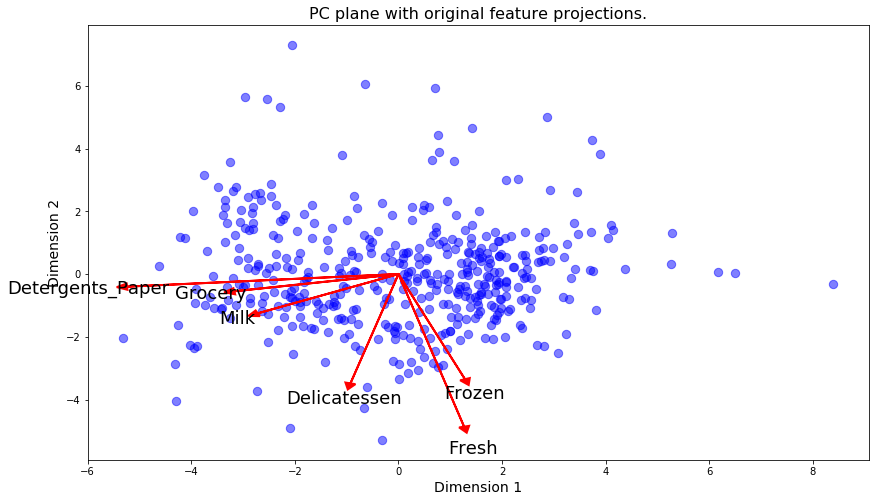

In [19]:
# Create a biplot
_ = vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the left corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

## Clustering

In this section, I will choose to use a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. After that, I will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

**Answer:**
1. What are the advantages to using a K-Means clustering algorithm? Hard clustering, that means each data point belongs to either a cluster completely or not.[1] The advantages of K-Means clustering algorithm are:[2] 
    Easy to implement, and fast computattion with large number of vairables 
    Produce tight cluster (hard clustering as mention above)
2. What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
    Soft clustering, that mean a data point won't be assigned into any specific cluster. Instead it will be given the probaility of that point in clusters. [1] 
    GMM is much more flexibale than KMeans [3] 
    GMM model accommodates mixed membership, that means each point or entry belongs to each cluster but with a different degrees.
3. Given observations about the wholesale customer data so far, which of the two algorithms will you use and why? 
    There is no need for hard clustering the entry 
    As the graph, we can see that the data distribution is not spherical 
    Data doesn't have standard distribution and it has many outlier For that reason, I will choose the Gaussian Mixture Model algorithm. 
    [1] http://arnoldit.com/wordpress/2016/11/17/hard-and-soft-clustering-explained/ 

    [2] http://stp.lingfil.uu.se/~santinim/ml/2016/Lect_10/10c_UnsupervisedMethods.pdf 
    
    [3] https://www.quora.com/What-are-the-advantages-to-using-a-Gaussian-Mixture-Model-clustering-algorithm

### Implementation: Creating Clusters
When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, I will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [20]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import scipy.stats
reduced_data_numpy = reduced_data.values

max_score = 0
best_number_of_cluster = 0

for numOfCluster in range(2,11):
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=numOfCluster).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = np.empty(shape=(clusterer.n_components, reduced_data_numpy.shape[1]))
    for i in range(clusterer.n_components):
      density = scipy.stats.multivariate_normal(cov=clusterer.covariances_[i], mean=clusterer.means_[i]).logpdf(reduced_data_numpy)
      centers[i, :] = reduced_data_numpy[np.argmax(density)]

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data,preds)
    if score > max_score:
        max_score = score
        best_number_of_cluster = numOfCluster
    print(score)

0.41398910887403234
0.40021999425470317
0.2970756071461675
0.20263906564210918
0.30594106202596366
0.2794200163476788
0.29045027260780004
0.2561765338669129
0.28433192007587066


In [21]:
print('Creating a model with {} clusters'.format(best_number_of_cluster))
clusterer = GaussianMixture(n_components=best_number_of_cluster).fit(reduced_data)
preds = clusterer.predict(reduced_data)
# centers = clusterer.cluster_centers_
centers = np.empty(shape=(clusterer.n_components, reduced_data_numpy.shape[1]))
for i in range(clusterer.n_components):
  density = scipy.stats.multivariate_normal(cov=clusterer.covariances_[i], mean=clusterer.means_[i]).logpdf(reduced_data_numpy)
  centers[i, :] = reduced_data_numpy[np.argmax(density)]
      
sample_preds = clusterer.predict(pca_samples)

Creating a model with 2 clusters


**Comment:**
The score for the number of cluster from 2-11 are above. The model with 2 clusters gives us the best score.

### Cluster Visualization
Now visualize the results by executing the code block below.

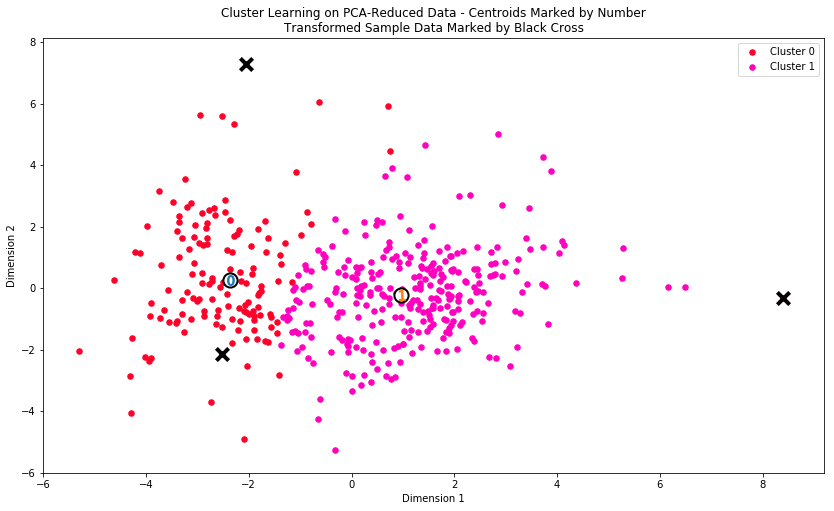

In [22]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, I will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [28]:
# Store the mean data
mean_of_data = data.describe().loc['mean']

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3437.000000,8050.000000,13271.00000,864.000000,5129.000000,961.000000
Segment 1,8744.000000,2413.000000,3057.00000,1999.000000,437.000000,785.000000
mean,7.529745,7.895559,8.44914,6.675928,6.062203,2.925537


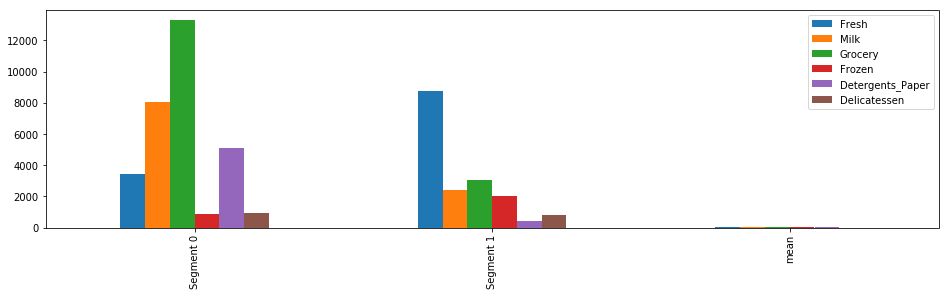

In [29]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
true_centers = true_centers.append(mean_of_data)
true_centers.plot(kind = 'bar', figsize = (16, 4))
display(true_centers)

**Comment:**
1. In comparision with the mean value of the data, the Segment 0 can have the following features: high value for milk, grocery, and detergents paper product, which may be higher than mean value of data. Moreover, a low value in frozen and delicatessen product can also be considered in classifying.
2. The segment 1 can be classified by the value of milk, grocery, detergent paper product but with quite high value in fresh product, which may be close to be the value of mean.

In [30]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i+1, "predicted to be in Cluster", pred)

Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1
Sample point 3 predicted to be in Cluster 0


**Comment:**
It can be said the prediction quite close to the segment.For example: 
1. The first sample point have low value in frozen (175) where mean(3071), in grocery(7417) where mean (7951), detergents paper (3468) mean (2881) and only 27 for delicatessen.
2. The second sample has a really high value in fresh product, but quite low indetergents.

## Conclusion

In this final section, I will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, I will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

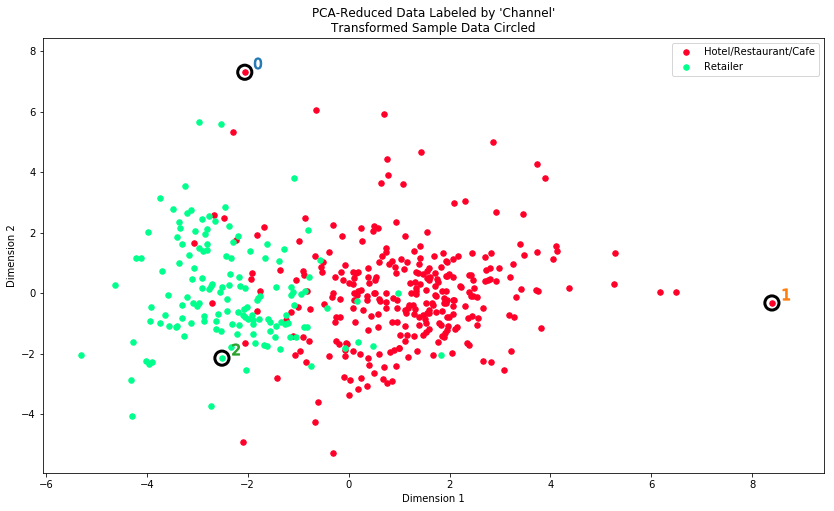

In [31]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

In [32]:
#find percentage of correctly classified customers
data = pd.read_csv("customers.csv")
data = data.drop(data.index[outliers]).reset_index(drop = True)

channels = data['Channel'].values
channels_by_frequency = collections.Counter(channels.flatten())
print(channels_by_frequency)

# might need to switch around the 0 and 1, based on your cluster seed
df = np.where(data['Channel'] == 2, 0, 1)
print ("Percentage of correctly classified customers: {:.2%}".format(sum(df == preds)/float(len(preds))))

Counter({1: 296, 2: 141})
Percentage of correctly classified customers: 89.47%
